<a href="https://colab.research.google.com/github/dhananjay093/Cotton_Disease_Predictor/blob/main/Cotton_Disease_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [3]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [18]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [19]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/cotton data/drive-download-20230912T025347Z-001/train'
valid_path = '/content/drive/MyDrive/cotton data/drive-download-20230912T025347Z-001/test'

In [20]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [21]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [22]:
 # useful for getting number of output classes

folders = glob('/content/drive/MyDrive/cotton data/drive-download-20230912T025347Z-001/train/*')

In [23]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [24]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [25]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94[0

In [26]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [27]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cotton data/drive-download-20230912T025347Z-001/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [31]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/cotton data/drive-download-20230912T025347Z-001/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [32]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


<ipython-input-32-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 904s 15s/step - loss: 1.7027 - accuracy: 0.7673 - val_loss: 0.7228 - val_accuracy: 0.8333
Epoch 2/20
61/61 [==============================] - 38s 620ms/step - loss: 0.5021 - accuracy: 0.8990 - val_loss: 0.7826 - val_accuracy: 0.7222
Epoch 3/20
61/61 [==============================] - 38s 621ms/step - loss: 0.7896 - accuracy: 0.8749 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 39s 648ms/step - loss: 0.6944 - accuracy: 0.9001 - val_loss: 1.0852 - val_accuracy: 0.8333
Epoch 5/20
61/61 [==============================] - 37s 606ms/step - loss: 0.4856 - accuracy: 0.9267 - val_loss: 0.3827 - val_accuracy: 0.9444
Epoch 6/20
61/61 [==============================] - 37s 609ms/step - loss: 0.4500 - accuracy: 0.9400 - val_loss: 0.1230 - val_accuracy: 0.8889
Epoch 7/20
61/61 [==============================] - 38s 622ms/step - loss: 0.3177 - accuracy: 0.9508 - val_loss: 0.0034 - val_accuracy: 1.0000


In [33]:
import matplotlib.pyplot as plt

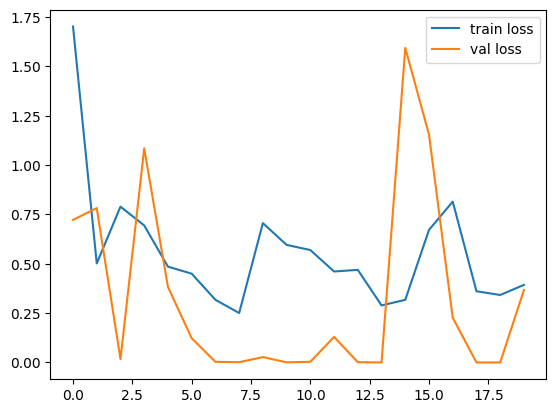

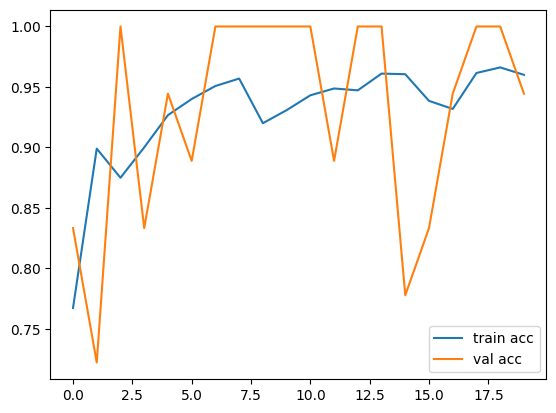

<Figure size 640x480 with 0 Axes>

In [34]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [35]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inceptionV3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
# save it as a keras


from tensorflow.keras.models import load_model

model.save('model_inceptionV3.keras')

In [37]:
y_pred = model.predict(test_set)

1/1 [==============================] - 4s 4s/step


In [38]:
y_pred

array([[0.0000000e+00, 2.2985510e-38, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 3.3560453e-35, 1.8109332e-21, 5.6900768e-15],
       [0.0000000e+00, 1.0000000e+00, 5.0959955e-32, 3.2777792e-19],
       [1.1622368e-27, 1.3398427e-09, 2.9216288e-27, 1.0000000e+00],
       [5.7001543e-16, 9.9523063e-18, 1.0000000e+00, 6.4922330e-13],
       [1.3435092e-03, 9.9865651e-01, 2.2596659e-25, 3.5232185e-15],
       [2.5897759e-17, 6.8479189e-18, 1.0000000e+00, 4.0453491e-11],
       [6.3161584e-26, 3.1789190e-35, 1.0000000e+00, 4.0616559e-33],
       [1.0000000e+00, 1.5903484e-26, 3.3446605e-26, 1.1726933e-35],
       [4.8753427e-30, 9.3720474e-12, 6.6186334e-22, 1.0000000e+00],
       [4.9336107e-19, 1.1907338e-08, 3.7587894e-22, 1.0000000e+00],
       [0.0000000e+00, 3.3106889e-20, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [5.2483419e-17, 1.6252727e-08, 1.0000000e+00, 1.1019816e-24],
       [0.0000000e+00, 1.0000000e+